<a href="https://colab.research.google.com/github/prashant0919/Codesoft-internship/blob/main/spamsmsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset with explicit encoding
data = pd.read_csv('spam.csv', encoding='latin1')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Summary Statistics
print(data.describe())

          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [ ]:
# Class Distribution
class_distribution = data['v1'].value_counts()
print(class_distribution)

ham     4825
spam     747
Name: v1, dtype: int64


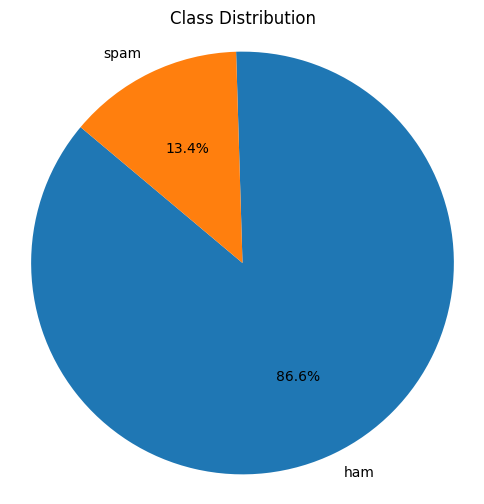

In [ ]:
# Visualization
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()


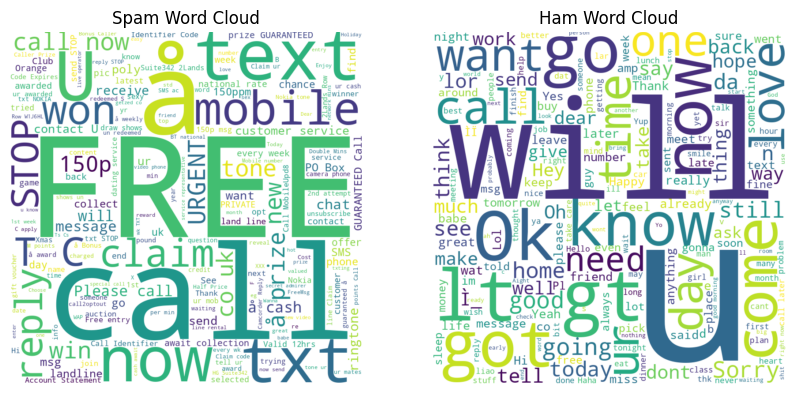

In [ ]:
# Word Cloud
spam_messages = ' '.join(data[data['v1'] == 'spam']['v2'])
ham_messages = ' '.join(data[data['v1'] == 'ham']['v2'])

spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(spam_messages)
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(ham_messages)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
# Apply preprocessing to the dataset
data['v2'] = data['v2'].apply(preprocess_text)

In [ ]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Logistic Regression Classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Predictions using Logistic Regression
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test_tfidf)

In [ ]:
# Model Evaluation for Logistic Regression
# Accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Logistic Regression Accuracy:", accuracy_logistic_regression)

Logistic Regression Accuracy: 0.9497757847533632


In [ ]:
# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic_regression))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



In [ ]:
# Confusion Matrix
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic_regression)

Confusion Matrix for Logistic Regression:
[[961   4]
 [ 52  98]]


In [ ]:
# SVM Classifier
svm_classifier = SVC(kernel='linear')  # Linear kernel is used for simplicity
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
# Predictions using SVM
y_pred_svm = svm_classifier.predict(X_test_tfidf)

In [ ]:
# Model Evaluation for SVM
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9802690582959641


In [ ]:
# Classification Report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

Confusion Matrix for SVM:
[[963   2]
 [ 20 130]]


In [ ]:
# Training Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predictions using Naive Bayes
y_pred_naive_bayes = naive_bayes_classifier.predict(X_test_tfidf)

In [ ]:
# Model Evaluation for Naive Bayes
# Accuracy
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print("Naive Bayes Accuracy:", accuracy_naive_bayes)

Naive Bayes Accuracy: 0.9623318385650225


In [ ]:
# Classification Report
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_naive_bayes))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:

# Confusion Matrix
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix_naive_bayes)

Confusion Matrix for Naive Bayes:
[[965   0]
 [ 42 108]]


In [ ]:
# Import necessary libraries
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Define preprocessing function
def preprocess_input(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Define function to test models
def test_model(model, vectorizer):
    while True:
        # Take input from the user
        text = input("Enter the message to classify (type 'exit' to quit): ")

        # Exit condition
        if text.lower() == 'exit':
            print("Exiting...")
            break

        # Preprocess the input
        preprocessed_text = preprocess_input(text)

        # Vectorize the preprocessed text
        text_vectorized = vectorizer.transform([preprocessed_text])

        # Make prediction
        prediction = model.predict(text_vectorized)[0]

        # Display the result
        print("Predicted:", prediction)

# Test Logistic Regression model
print("Testing Logistic Regression Model:")
test_model(logistic_regression_classifier, tfidf_vectorizer)

# Test SVM model
print("Testing SVM Model:")
test_model(svm_classifier, tfidf_vectorizer)

# Test Naive Bayes model
print("Testing Naive Bayes Model:")
test_model(naive_bayes_classifier, tfidf_vectorizer)


Testing Logistic Regression Model:
Enter the message to classify (type 'exit' to quit): free entry in worldcup final
Predicted: spam
Enter the message to classify (type 'exit' to quit): quit
Predicted: ham
Enter the message to classify (type 'exit' to quit): free entry in worldcup final 
Predicted: spam
Enter the message to classify (type 'exit' to quit): exit
Exiting...
Testing SVM Model:
Enter the message to classify (type 'exit' to quit): free entry in worldcup final
Predicted: spam
Enter the message to classify (type 'exit' to quit): exit
Exiting...
Testing Naive Bayes Model:
Enter the message to classify (type 'exit' to quit): free entry in worldcup final
Predicted: spam
Enter the message to classify (type 'exit' to quit): exit
Exiting...
